In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import seaborn as sns
import numpy as np
from collections import defaultdict
import pandas as pd

In [ ]:
file = '/YBEOBE/data/nikluge-ea-2023-train.jsonl'
new_file = '/YBEOBE/data/nikluge-ea-2023-train_modified.jsonl'

# 파일 비교

In [ ]:
# B 파일에서 input 데이터 읽기
with open('/YBEOBE/data/nikluge-ea-2023-train.jsonl', 'r') as f:
    b_inputs = {json.loads(line)['input']['form'] for line in f}

# A 파일에서 B에 없는 input 찾기
missing_from_b = []

with open('/YBEOBE/data/nikluge-ea-2023-train_modified.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        if data['input']['form'] not in b_inputs:
            missing_from_b.append(data['input'])

# 결과 출력
for entry in missing_from_b:
    print(json.dumps(entry, ensure_ascii=False, indent=2))


# 샘플 추출

In [ ]:
input_file = "/YBEOBE/data/nikluge-ea-2023-train.jsonl"
output_file = "output.jsonl"

with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
    for _ in range(10):
        line = infile.readline()
        if not line:  # 파일의 끝에 도달한 경우 종료
            break
        outfile.write(line)

# 엑셀 파일로 변환

In [3]:
# JSONL 파일을 읽어서 리스트로 변환
with open('/YBEOBE/data/nikluge-ea-2023-train.jsonl', 'r', encoding='utf-8') as f:
    data = [json.loads(next(f)) for _ in range(10)]

# 데이터를 DataFrame으로 변환
df = pd.DataFrame({
    'id': [item['id'] for item in data],
    'input_form': [item['input']['form'] for item in data],
    'target_form': [item['input']['target']['form'] for item in data],
    'target_begin': [item['input']['target']['begin'] for item in data],
    'target_end': [item['input']['target']['end'] for item in data],
    'output_joy': [item['output']['joy'] for item in data],
    'output_anticipation': [item['output']['anticipation'] for item in data],
    'output_trust': [item['output']['trust'] for item in data],
    'output_surprise': [item['output']['surprise'] for item in data],
    'output_disgust': [item['output']['disgust'] for item in data],
    'output_fear': [item['output']['fear'] for item in data],
    'output_anger': [item['output']['anger'] for item in data],
    'output_sadness': [item['output']['sadness'] for item in data]
})

# DataFrame을 Excel 파일로 저장
df.to_excel('sample.xlsx', index=False)


# 감정 라벨 분석

### 감정 라벨 개수 세고 막대 그래프

{'joy': 20176, 'anticipation': 8738, 'trust': 2127, 'surprise': 2563, 'disgust': 1443, 'fear': 822, 'anger': 1559, 'sadness': 2408}
Total emotions: 39836
duplicated_label emotions count: 3787
multi_label emotion counts by type: {'joy&trust': 1628, 'joy&anticipation': 705, 'joy&surprise': 146, 'joy&sadness': 131, 'disgust&anger': 270, 'anticipation&fear': 75, 'anticipation&sadness': 134, 'joy&anger': 28, 'joy&fear': 39, 'joy&anticipation&trust': 89, 'surprise&sadness': 30, 'disgust&fear': 23, 'anticipation&anger': 15, 'anticipation&surprise': 20, 'disgust&sadness': 21, 'anger&sadness': 31, 'joy&trust&anger': 1, 'surprise&disgust': 23, 'joy&trust&sadness': 11, 'anticipation&trust': 15, 'fear&anger': 9, 'joy&disgust': 43, 'fear&sadness': 26, 'joy&surprise&sadness': 1, 'trust&sadness': 3, 'anticipation&surprise&sadness': 1, 'trust&fear': 3, 'joy&trust&surprise': 9, 'joy&trust&fear': 8, 'surprise&anger': 30, 'anticipation&disgust': 17, 'joy&fear&sadness': 4, 'trust&surprise': 14, 'joy&antic

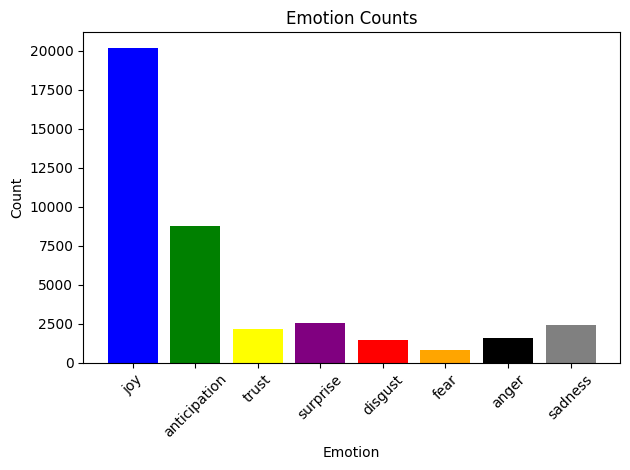

In [ ]:
with open('/YBEOBE/data/nikluge-ea-2023-train.jsonl', "r") as file:
    lines = file.readlines()

emotion_counts = {
    "joy": 0,
    "anticipation": 0,
    "trust": 0,
    "surprise": 0,
    "disgust": 0,
    "fear": 0,
    "anger": 0,
    "sadness": 0
}

multi_label_emotion_combinations = defaultdict(int)

total_emotions = 0
multi_label_emotions_count = 0

for line in lines:
    data = json.loads(line)

    true_count = sum(1 for value in data["output"].values() if value == "True")
    true_emotions = [emotion for emotion, value in data["output"].items() if value == "True"]

    if true_count > 1:
        multi_label_emotions_count += (true_count - 1)
        multi_label_emotion_combinations["&".join(true_emotions)] += 1

    for emotion, value in data["output"].items():
        if value == "True":
            emotion_counts[emotion] += 1
            total_emotions += 1

print(emotion_counts)
print(f"Total emotions: {total_emotions}")
# 중복 감정 총 개수
print(f"duplicated_label emotions count: {multi_label_emotions_count}")
# multi label 종류
print("multi_label emotion counts by type:", dict(multi_label_emotion_combinations))
print("multi_label emotion counts", sum(dict(multi_label_emotion_combinations).values()))

emotions = list(emotion_counts.keys())
counts = list(emotion_counts.values())

plt.bar(emotions, counts, color=['blue', 'green', 'yellow', 'purple', 'red', 'orange', 'black', 'gray'])
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2감정, 3감정 분류

In [ ]:
two_emotion_labels = {}
three_emotion_labels = {}

for key, value in dict(multi_label_emotion_combinations).items():
    emotion_count = key.count('&')
    if emotion_count == 1:
        two_emotion_labels[key] = value
    elif emotion_count == 2:
        three_emotion_labels[key] = value

print(two_emotion_labels)
print(three_emotion_labels)



{'joy&trust': 1697, 'joy&anticipation': 740, 'joy&surprise': 149, 'disgust&anger': 285, 'anticipation&fear': 78, 'anticipation&sadness': 140, 'joy&anger': 28, 'joy&fear': 41, 'surprise&sadness': 30, 'disgust&fear': 24, 'anticipation&anger': 15, 'anticipation&surprise': 23, 'disgust&sadness': 22, 'joy&sadness': 132, 'anger&sadness': 32, 'surprise&disgust': 24, 'anticipation&trust': 16, 'fear&anger': 9, 'joy&disgust': 43, 'fear&sadness': 26, 'trust&sadness': 3, 'trust&fear': 3, 'surprise&anger': 30, 'anticipation&disgust': 18, 'trust&surprise': 15, 'trust&disgust': 2, 'surprise&fear': 10, 'trust&anger': 1}
{'joy&anticipation&trust': 90, 'joy&trust&anger': 1, 'joy&trust&sadness': 11, 'joy&surprise&sadness': 1, 'anticipation&surprise&sadness': 1, 'joy&trust&surprise': 9, 'joy&trust&fear': 8, 'joy&anticipation&disgust': 2, 'joy&anger&sadness': 2, 'disgust&fear&sadness': 1, 'joy&fear&sadness': 4, 'joy&disgust&fear': 1, 'joy&surprise&fear': 1, 'joy&anticipation&sadness': 4, 'anticipation&trus

### 2감정 heatmap

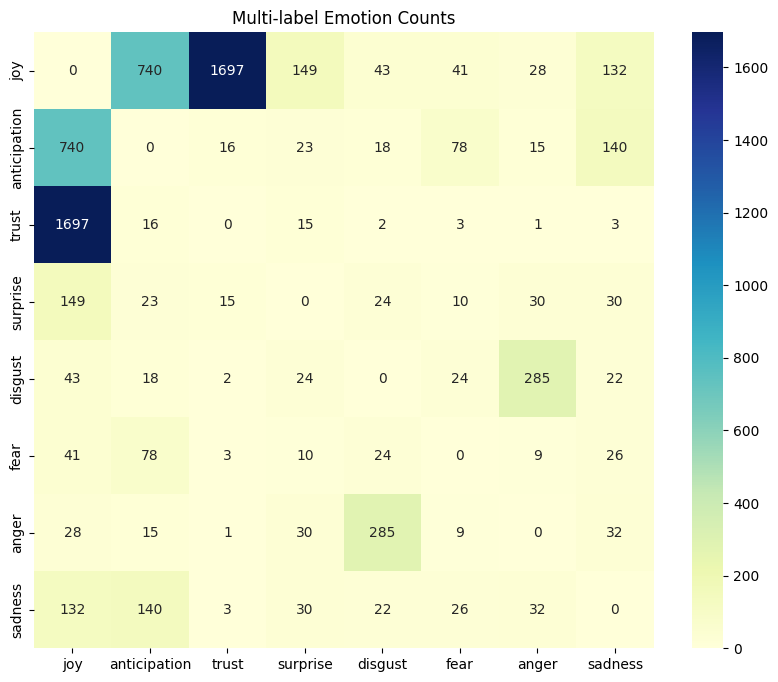

In [ ]:
all_emotions = ["joy", "anticipation", "trust", "surprise", "disgust", "fear", "anger", "sadness"]

matrix = np.zeros((len(all_emotions), len(all_emotions)))

for combo, count in two_emotion_labels.items():
    emotions = combo.split("&")
    for e1 in emotions:
        for e2 in emotions:
            if e1 != e2:
                matrix[all_emotions.index(e1)][all_emotions.index(e2)] += count

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="YlGnBu", xticklabels=all_emotions, yticklabels=all_emotions, fmt="g")
plt.title("Multi-label Emotion Counts")
plt.show()

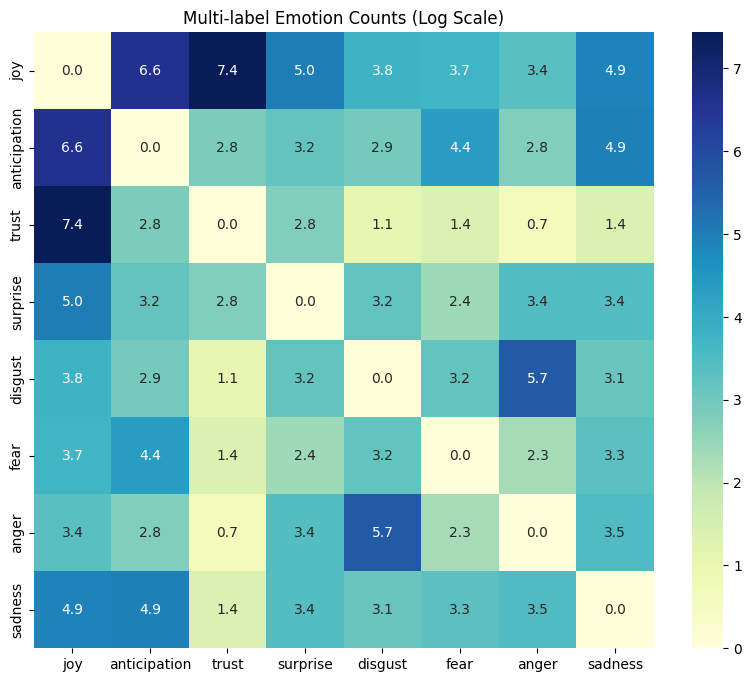

In [ ]:
# 2감정 heatmap
all_emotions = ["joy", "anticipation", "trust", "surprise", "disgust", "fear", "anger", "sadness"]

matrix = np.zeros((len(all_emotions), len(all_emotions)))

matrix = np.zeros((len(all_emotions), len(all_emotions)))

# 감정 조합에서 카운트 추출 및 행렬에 추가
for combo, count in two_emotion_labels.items():
    emotions = combo.split("&")
    for e1 in emotions:
        for e2 in emotions:
            if e1 != e2:
                matrix[all_emotions.index(e1)][all_emotions.index(e2)] += count

# 로그 스케일 적용 (0이 아닌 모든 값에 +1을 하여 로그 변환을 안전하게 수행)
matrix = np.log(matrix + 1)

# Heatmap 생성
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="YlGnBu", xticklabels=all_emotions, yticklabels=all_emotions, fmt=".1f")
plt.title("Multi-label Emotion Counts (Log Scale)")
plt.show()

### 3감정 3차원 그래프

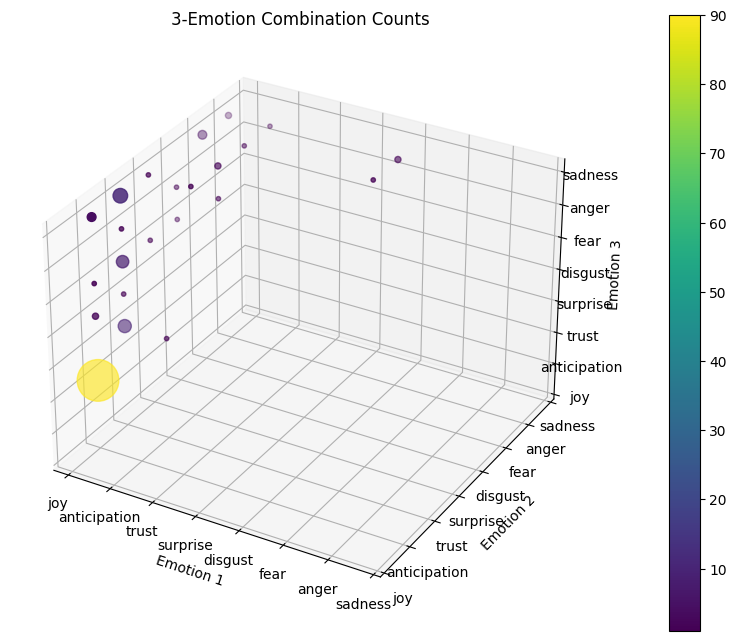

In [ ]:
x, y, z, s = [], [], [], []

for combo, count in three_emotion_labels.items():
    e1, e2, e3 = combo.split('&')
    x.append(all_emotions.index(e1))
    y.append(all_emotions.index(e2))
    z.append(all_emotions.index(e3))
    s.append(count)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=s, s=np.array(s) * 10, cmap='viridis')


cbar = fig.colorbar(scatter, ax=ax, pad=0.1)

ax.set_xticks(range(len(all_emotions)))
ax.set_yticks(range(len(all_emotions)))
ax.set_zticks(range(len(all_emotions)))
ax.set_xticklabels(all_emotions)
ax.set_yticklabels(all_emotions)
ax.set_zticklabels(all_emotions)
ax.set_xlabel('Emotion 1')
ax.set_ylabel('Emotion 2')
ax.set_zlabel('Emotion 3')
ax.set_title("3-Emotion Combination Counts")

plt.show()

# 중복 form 찾기

### 완전 중복 제거(input, output 모두 동일)

In [ ]:
# 중복 제거를 위한 세트
unique_entries = set()

# 새로운 파일에 쓸 내용
new_content = []

with open(file, 'r', encoding='utf-8') as file:
    for line in file:
        entry = json.loads(line.strip())
        # 'input'과 'output' 값을 이용해 문자열 키 생성
        entry_key = json.dumps(entry['input']) + json.dumps(entry['output'])
        if entry_key not in unique_entries:
            unique_entries.add(entry_key)
            new_content.append(line)

# 새로운 파일에 쓰기
with open(new_file, 'w', encoding='utf-8') as file:
    for line in new_content:
        file.write(line)


### 잘못된 데이터(?) 확인 (input 완전 동일한데 output 다름)

In [ ]:
form_target_groups = defaultdict(list)

with open(new_file, 'r') as f:
    for line in f:
        data = json.loads(line)
        form = data['input']['form']
        target = data['input']['target']
        form_target_groups[(form, str(target))].append(data)

for (form, target), group in form_target_groups.items():
    if len(group) > 1:
        print(f"form '{form}'과 target '{target}'이/가 동일한 데이터:")
        for item in group:
            print(json.dumps(item, ensure_ascii=False))
        print("\n" + "="*50 + "\n")


### form 같고 target 다른 데이터

In [ ]:
# "form"의 값에 따른 json 항목을 저장할 딕셔너리 생성
form_entries = defaultdict(list)

# 파일에서 모든 항목 읽기
with open(new_file, 'r') as f:
    for line in f:
        data = json.loads(line)
        form = data['input']['form']
        form_entries[form].append(data)

# 중복된 "form"을 가진 항목을 처리
for form, entries in form_entries.items():
    if len(entries) > 1:
        print(f"Duplicate entries for form: {form}")
        for entry in entries:
            print(json.dumps(entry, ensure_ascii=False))
        print("\n" + "-" * 50 + "\n")  # 구분선 추가

print(f"Number of groups with identical 'form': {sum(1 for entries in form_entries.values() if len(entries) > 1)}")



### form 같고 target 다르고 output도 다른 데이터

In [ ]:
# "form"의 값에 따른 json 항목을 저장할 딕셔너리 생성
form_counts = defaultdict(list)

# 파일에서 모든 항목 읽기
with open(new_file, 'r') as f:
    for line in f:
        data = json.loads(line)
        form = data['input']['form']
        form_counts[form].append(data)

# 중복된 "form"이 있는 항목만 출력하고 그룹 수 세기
group_count = 0
for form, entries in form_counts.items():
    if len(entries) > 1 and any(entry['output'] != entries[0]['output'] for entry in entries[1:]):
        group_count += 1
        print(f"Group {group_count} with different outputs for form: {form}")
        for entry in entries:
            print(json.dumps(entry, ensure_ascii=False))
        print("\n" + "-" * 50 + "\n")  # 구분선 추가

print(f"Total number of groups with the same form but different outputs: {group_count}")


# 동일감정제거

In [ ]:
# "form"의 값에 따른 json 객체를 저장할 딕셔너리 생성
form_entries = defaultdict(list)

# 파일에서 모든 항목 읽기 (파일 경로를 적절하게 수정해야 함)
with open(new_file, 'r') as f:
    for line in f:
        data = json.loads(line)
        form = data['input']['form']
        form_entries[form].append(data)

# 결과를 저장할 리스트
result = []

# 동일한 "form"을 가진 항목들을 처리
for form, entries in form_entries.items():
    if len(entries) > 1:
        # 동일한 "output"을 가진 항목만 저장할 딕셔너리 생성
        output_entries = defaultdict(list)
        for entry in entries:
            output = json.dumps(entry['output'])
            output_entries[output].append(entry)

        # 동일한 "output"을 가진 항목들을 처리
        for output_group in output_entries.values():
            # 첫 번째 항목만 사용하고 나머지 "target"은 제거
            main_entry = output_group[0].copy()
            for other_entry in output_group[1:]:
                target_form = other_entry['input']['target']['form']
                if target_form is not None:
                    main_entry['input']['form'] = main_entry['input']['form'].replace(target_form, "", 1)
            result.append(main_entry)
    else:
        # 항목이 하나뿐인 경우 그대로 저장
        result.append(entries[0])

# 결과를 새 파일에 저장
with open('result.jsonl', 'w') as f:
    for item in result:
        f.write(json.dumps(item, ensure_ascii=False) + '\n')


